<a href="https://colab.research.google.com/github/mansh2060/fraud-detection/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Fraud.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2682184,210,PAYMENT,1333.03,C1927092874,0.0,0.0,M32301274,0.0,0.0,0.0,0.0
2682185,210,PAYMENT,14997.68,C1233072330,0.0,0.0,M885429593,0.0,0.0,0.0,0.0
2682186,210,PAYMENT,13474.88,C785764353,0.0,0.0,M1213796145,0.0,0.0,0.0,0.0
2682187,210,PAYMENT,22200.76,C2014355344,0.0,0.0,M2021437846,0.0,0.0,0.0,0.0
2682188,210,PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682189 entries, 0 to 2682188
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 225.1+ MB


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,1
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [10]:
for column in df:
   if df[column].isnull().sum()==1 and df[column].dtype==object:
      df[column]=df[column].fillna('default')
   if df[column].isnull().sum()==1 and df[column].dtype==float:
      df[column]=df[column].fillna(df[column].mode()[0])

In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682189 entries, 0 to 2682188
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 225.1+ MB


In [13]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2682184,210,PAYMENT,1333.03,C1927092874,0.0,0.0,M32301274,0.0,0.0,0.0,0.0
2682185,210,PAYMENT,14997.68,C1233072330,0.0,0.0,M885429593,0.0,0.0,0.0,0.0
2682186,210,PAYMENT,13474.88,C785764353,0.0,0.0,M1213796145,0.0,0.0,0.0,0.0
2682187,210,PAYMENT,22200.76,C2014355344,0.0,0.0,M2021437846,0.0,0.0,0.0,0.0
2682188,210,PAYMENT,10000000.00,default,0.0,0.0,default,0.0,0.0,0.0,0.0


In [14]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.682189e+06,2.682189e+06,2.682189e+06,2.682189e+06,2.682189e+06,2.682189e+06,2.682189e+06,2682189.0
mean,1.126016e+02,1.576028e+05,8.494775e+05,8.709649e+05,9.952303e+05,1.104422e+06,8.735402e-04,0.0
std,7.228943e+01,2.629862e+05,2.926180e+06,2.962582e+06,2.299495e+06,2.383588e+06,2.954281e-02,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3.600000e+01,1.256689e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.370000e+02,7.731246e+04,1.479700e+04,0.000000e+00,1.394840e+05,2.273579e+05,0.000000e+00,0.0
75%,1.800000e+02,2.128997e+05,1.158920e+05,1.565698e+05,9.470666e+05,1.134954e+06,0.000000e+00,0.0
max,2.100000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,0.0


Text(0.5, 1.0, 'Distribution of Fraudelent Transactions')

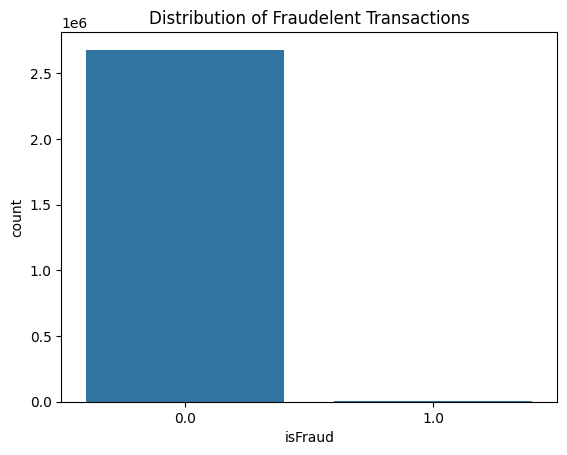

In [15]:
sns.countplot(x='isFraud',data=df)
plt.title('Distribution of Fraudelent Transactions')


Text(0.5, 1.0, 'Amount vs Fraud')

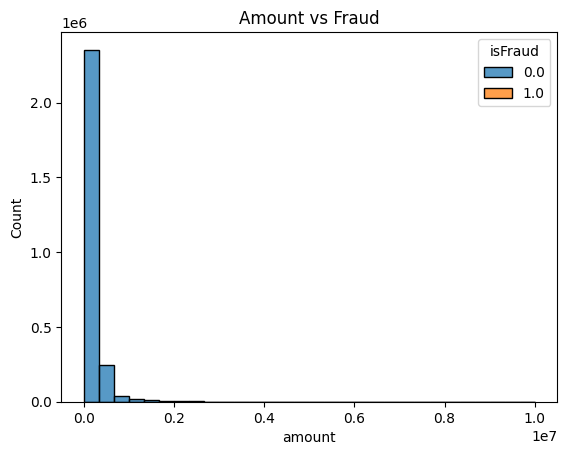

In [16]:
sns.histplot(data=df,x='amount',hue='isFraud',multiple='stack',bins=30)
plt.title("Amount vs Fraud")

Text(0.5, 1.0, 'Amount VS Fraud')

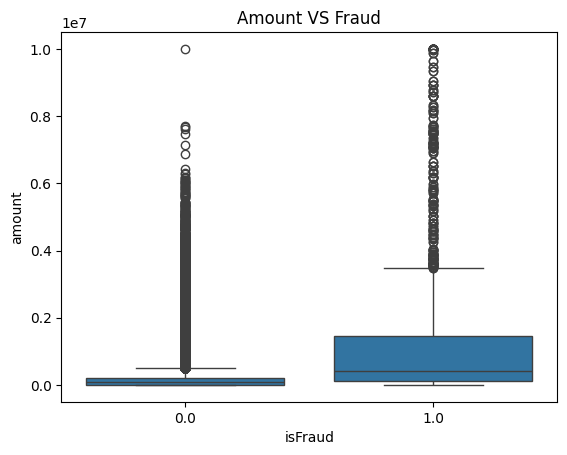

In [17]:
sns.boxplot(data=df,x='isFraud',y='amount')
plt.title('Amount VS Fraud')

In [18]:
columns=df.columns.tolist()
columns.insert(-2,columns.pop(-11))
df=df[columns]
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,step,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,1,0.0,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1,0.0,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1.0,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1.0,0.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,1,0.0,0.0


Text(0.5, 1.0, 'Correlation_matrix')

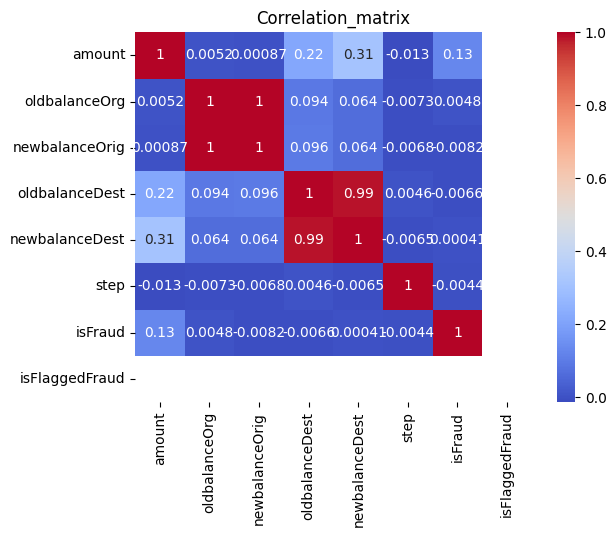

In [19]:
num_columns=[]
for column in df:
  if df[column].dtype!=object:
    num_columns.append(column)
correlation_matrix=df[num_columns].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation_matrix')

In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_encoder=LabelEncoder()
for column in df:
  if df[column].dtype==object:
    df[column]=label_encoder.fit_transform(df[column])
    print(df[column])



0          3
1          3
2          4
3          1
4          3
          ..
2682184    3
2682185    3
2682186    3
2682187    3
2682188    3
Name: type, Length: 2682189, dtype: int64
0           320450
1           924207
2           423554
3          2458711
4          1453530
            ...   
2682184    1284709
2682185     323380
2682186    2383103
2682187    1406185
2682188    2680496
Name: nameOrig, Length: 2682189, dtype: int64
0           696867
1           726901
2           187235
3           166833
4           350264
            ...   
2682184     824806
2682185    1084802
2682186     342436
2682187     716215
2682188    1138169
Name: nameDest, Length: 2682189, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682189 entries, 0 to 2682188
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   step            int64  
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(4)
memory usage: 225.1 MB


In [22]:
x=df.drop(['nameOrig','nameDest','isFlaggedFraud','isFraud'],axis=1)
y=df['isFraud']

In [23]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step
0,3,9839.64,170136.0,160296.36,0.0,0.0,1
1,3,1864.28,21249.0,19384.72,0.0,0.0,1
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
x_test=scaling.transform(x_test)


In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
y_pred=logistic_regression.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.999364325420645


<Axes: >

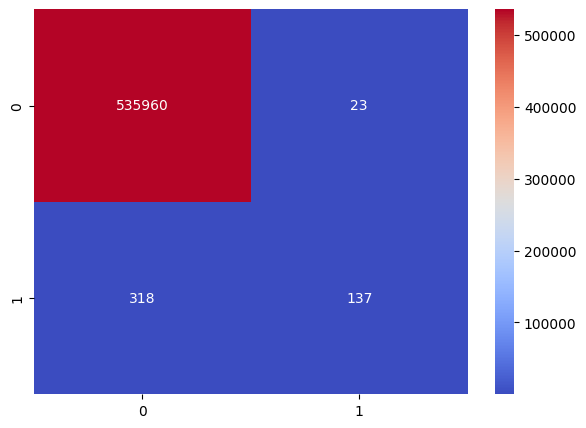

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9996066647030971


Text(0.5, 1.0, 'KNN Confusion Matrix')

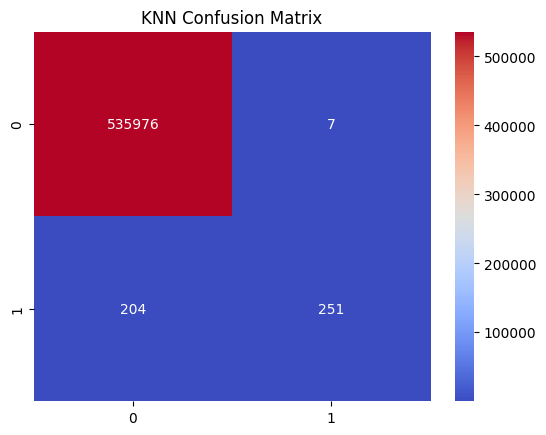

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')
plt.title('KNN Confusion Matrix')

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [34]:
y_pred=decision_tree.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9996719098945265


Text(0.5, 1.0, 'Decision tree confusion matrix')

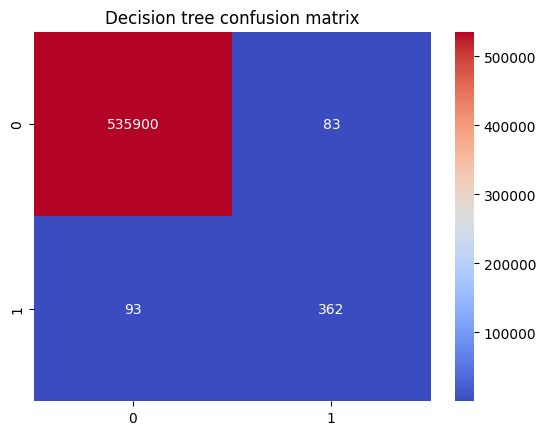

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')
plt.title('Decision tree confusion matrix')